1. (25%)  Given the data set, do a quick exploratory data analysis to get a feel for the distributions and biases of the data.  Report any visualizations and findings used and suggest any other impactful business use cases for that data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset
df = pd.read_csv('/Users/wangxueying/Desktop/XTern_Data.csv')

In [2]:
df.head()

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


In [3]:
# Checking for missing values
print(df.shape)
print(df.isnull().sum())

(5000, 5)
Year          0
Major         0
University    0
Time          0
Order         0
dtype: int64


In [4]:
df.describe()

,Time
count,5000.000000
mean,12.528200
std,1.357193
min,8.000000
25%,12.000000
50%,13.000000
75%,13.000000
max,17.000000


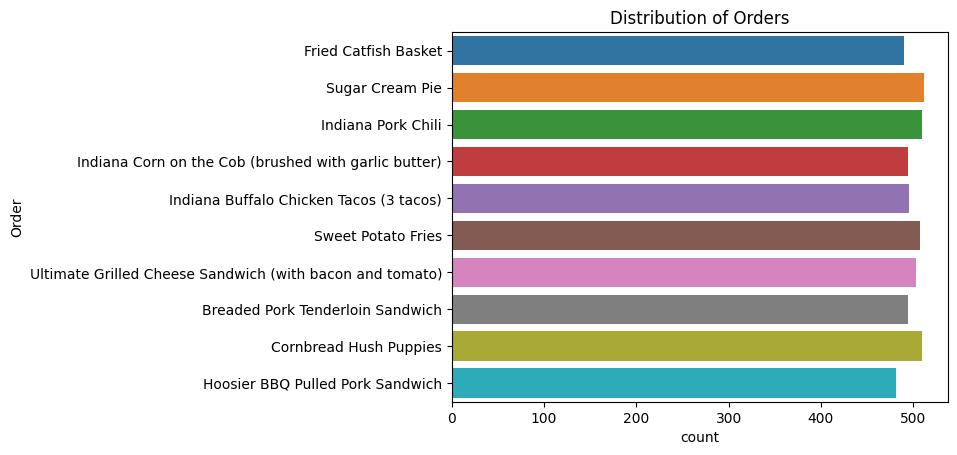

<Figure size 1500x1000 with 0 Axes>

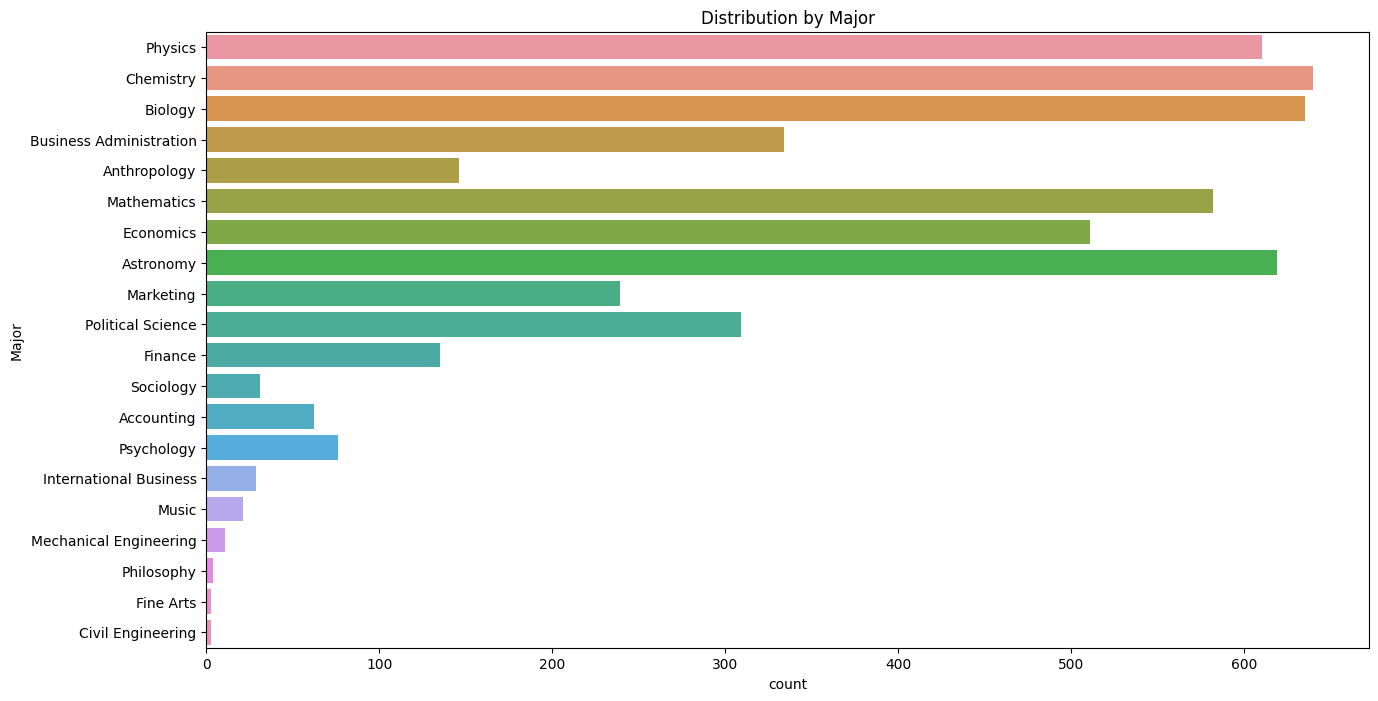

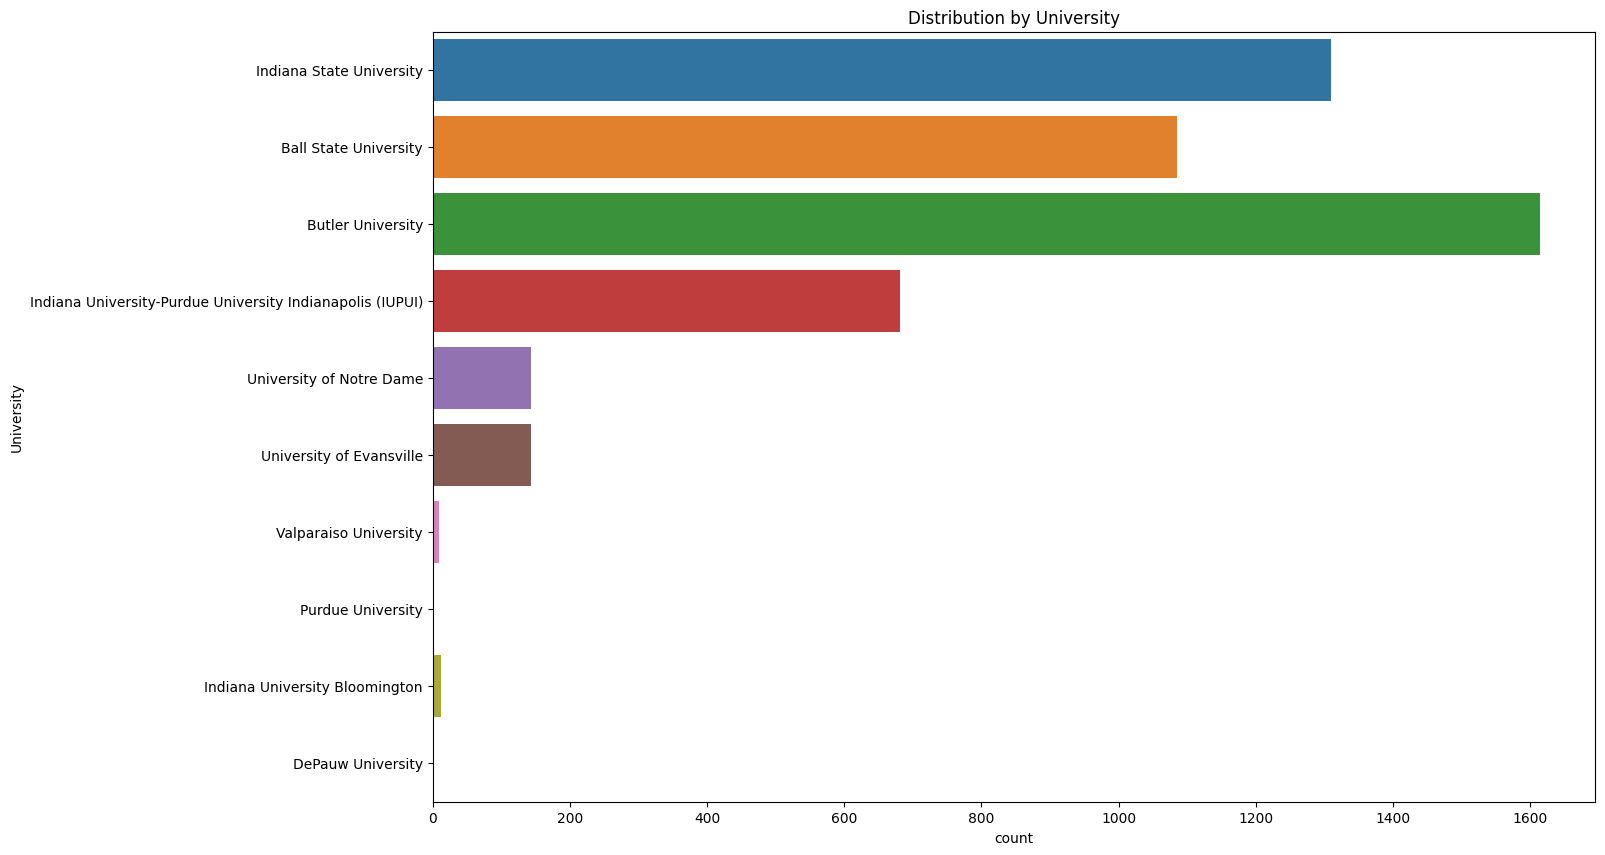

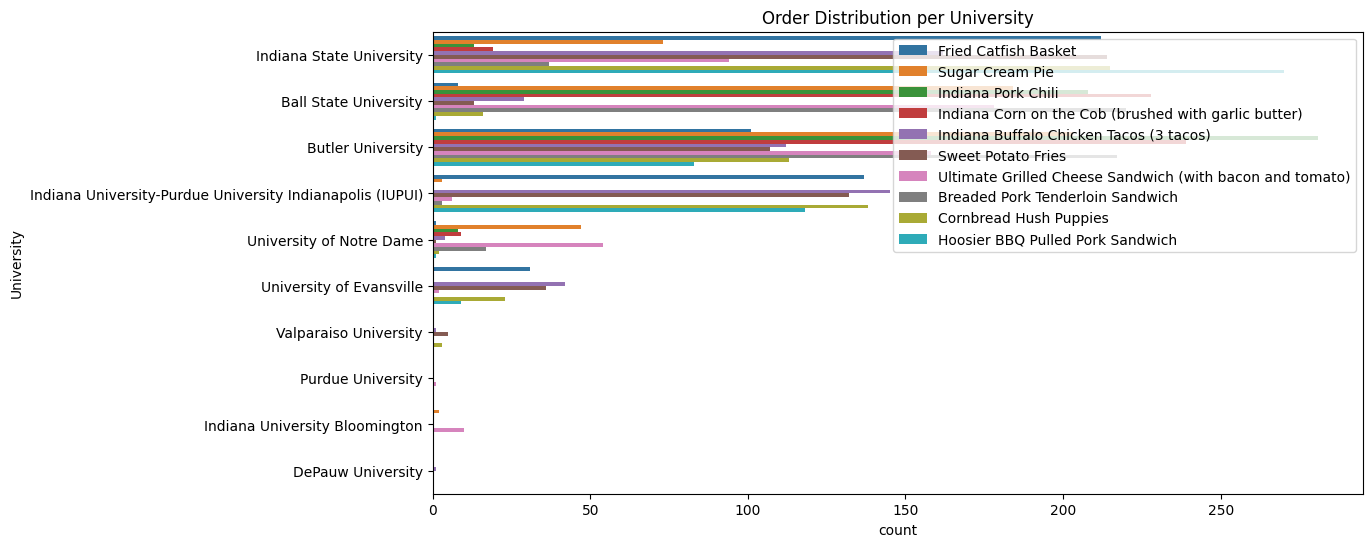

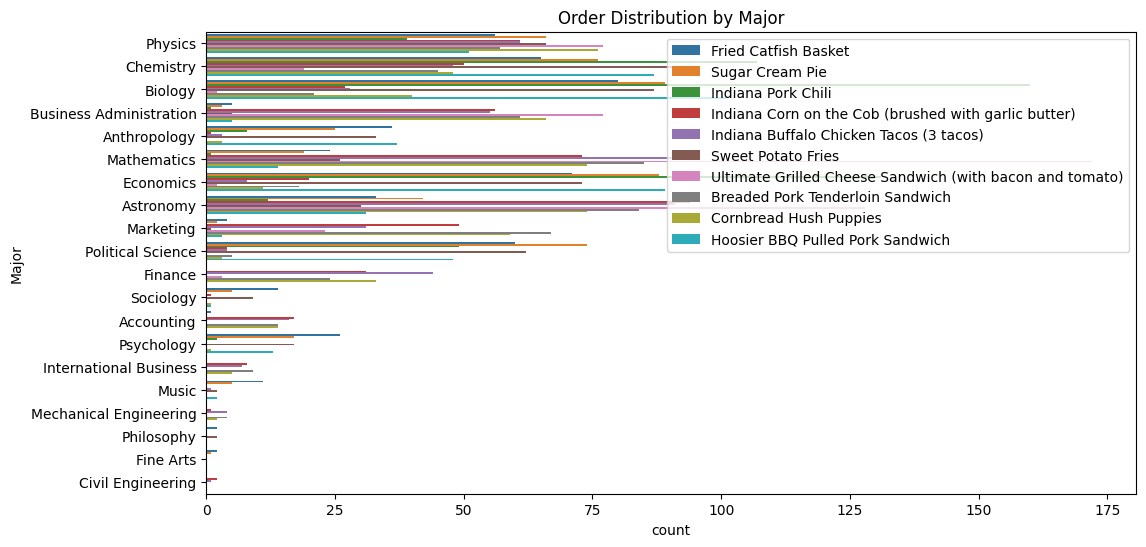

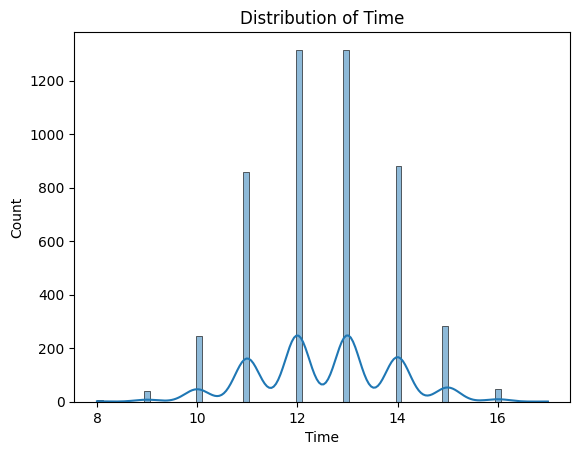

In [5]:
# Checking the distribution of orders
sns.countplot(y='Order', data=df)
plt.title('Distribution of Orders')
plt.show()

# Orders Distribution
plt.figure(figsize=(15, 10))

# Distribution by Major
plt.figure(figsize=(15, 8))
sns.countplot(data=df, y='Major')
plt.title('Distribution by Major')
plt.show()

# Distribution by University
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='University')
plt.title('Distribution by University')
plt.show()

# Checking distribution of orders per university
plt.figure(figsize=(12, 6))
sns.countplot(y='University', hue='Order', data=df)
plt.title('Order Distribution per University')
plt.legend(loc='upper right')
plt.show()

# Checking order distribution by major
plt.figure(figsize=(12, 6))
sns.countplot(y='Major', hue='Order', data=df)
plt.title('Order Distribution by Major')
plt.legend(loc='upper right')
plt.show()

# Checking the distribution of time
sns.histplot(df['Time'], kde=True)
plt.title('Distribution of Time')
plt.show()


In [6]:
# Get the most ordered food from each university
most_ordered = df.groupby(['University', 'Order']).size().reset_index(name='count')

most_ordered_per_university = most_ordered.loc[most_ordered.groupby('University')['count'].idxmax()]

print(most_ordered_per_university[['University', 'Order']])

                                           University  \
5                               Ball State University   
16                                  Butler University   
20                                  DePauw University   
24                           Indiana State University   
32                     Indiana University Bloomington   
37  Indiana University-Purdue University Indianapo...   
41                                  Purdue University   
45                           University of Evansville   
57                           University of Notre Dame   
60                              Valparaiso University   

                                                Order  
5   Indiana Corn on the Cob (brushed with garlic b...  
16                                 Indiana Pork Chili  
20            Indiana Buffalo Chicken Tacos (3 tacos)  
24                   Hoosier BBQ Pulled Pork Sandwich  
32  Ultimate Grilled Cheese Sandwich (with bacon a...  
37            Indiana Buffalo Chicke

In [7]:
# Get the top3 ordered food from each major
order_counts = df.groupby(['University', 'Order']).size().reset_index(name='count')

order_counts_sorted = order_counts.sort_values(by=['University', 'count'], ascending=[True, False])

top_orders_per_university = order_counts_sorted.groupby('University').head(3)

print(top_orders_per_university)


                                           University  \
5                               Ball State University   
0                               Ball State University   
6                               Ball State University   
16                                  Butler University   
15                                  Butler University   
10                                  Butler University   
20                                  DePauw University   
24                           Indiana State University   
22                           Indiana State University   
29                           Indiana State University   
32                     Indiana University Bloomington   
31                     Indiana University Bloomington   
37  Indiana University-Purdue University Indianapo...   
34  Indiana University-Purdue University Indianapo...   
35  Indiana University-Purdue University Indianapo...   
41                                  Purdue University   
45                           Un

In [8]:
# Get the most ordered food from each major
most_ordered = df.groupby(['Major', 'Order']).size().reset_index(name='count')

most_ordered_per_university = most_ordered.loc[most_ordered.groupby('Major')['count'].idxmax()]

print(most_ordered_per_university[['Major', 'Order']])

                       Major  \
4                 Accounting   
7               Anthropology   
22                 Astronomy   
29                   Biology   
42   Business Administration   
49                 Chemistry   
54         Civil Engineering   
61                 Economics   
67                   Finance   
70                 Fine Arts   
72    International Business   
76                 Marketing   
94               Mathematics   
95    Mechanical Engineering   
99                     Music   
104               Philosophy   
115                  Physics   
123        Political Science   
126               Psychology   
132                Sociology   

                                                 Order  
4    Indiana Corn on the Cob (brushed with garlic b...  
7                     Hoosier BBQ Pulled Pork Sandwich  
22   Ultimate Grilled Cheese Sandwich (with bacon a...  
29                                  Indiana Pork Chili  
42   Ultimate Grilled Cheese Sandwich (wit

In [9]:
# Get the top3 ordered food from each major
order_counts = df.groupby(['Major', 'Order']).size().reset_index(name='count')

order_counts_sorted = order_counts.sort_values(by=['Major', 'count'], ascending=[True, False])

top_orders_per_university = order_counts_sorted.groupby('Major').head(3)

print(top_orders_per_university)

                       Major  \
4                 Accounting   
3                 Accounting   
0                 Accounting   
7               Anthropology   
6               Anthropology   
12              Anthropology   
22                 Astronomy   
18                 Astronomy   
17                 Astronomy   
29                   Biology   
26                   Biology   
30                   Biology   
42   Business Administration   
34   Business Administration   
33   Business Administration   
49                 Chemistry   
51                 Chemistry   
46                 Chemistry   
54         Civil Engineering   
53         Civil Engineering   
61                 Economics   
58                 Economics   
62                 Economics   
67                   Finance   
66                   Finance   
68                   Finance   
70                 Fine Arts   
71                 Fine Arts   
72    International Business   
75    International Business   
74    In

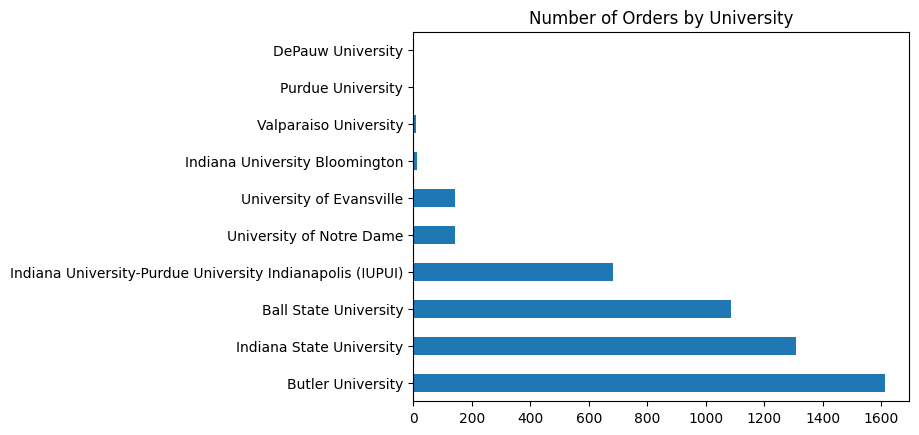

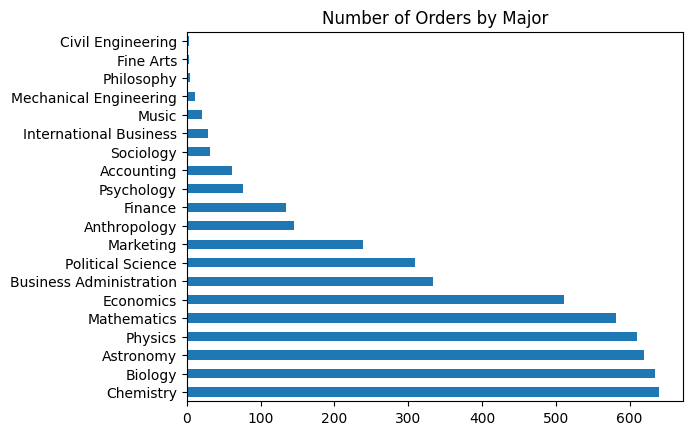

In [10]:
df['University'].value_counts().plot(kind='barh', title="Number of Orders by University")
plt.show()

df['Major'].value_counts().plot(kind='barh', title="Number of Orders by Major")
plt.show()

Discuss Ethical implications of these factors.


Given the question and the data analysis, several ethical implications arise:

Data Privacy and Confidentiality:
Universities and colleges often store a vast amount of personal data about their students. Even if names are not directly linked to this dataset, certain combinations of "Year", "Major", and "University" could make it easier to identify individuals, especially if combined with other datasets. Revealing a student's specific order could inadvertently disclose personal dietary preferences, religious beliefs, health concerns, or lifestyle choices.

Representation and Bias:
If the data only represents certain universities or specific groups within those universities, it might lead to biased insights that don't represent the entire student population. This bias could unfairly benefit or disadvantage certain groups. For instance, if the food choices of students from a particular major or year are overrepresented, it might result in catering services over-prioritizing their preferences at the expense of others.

Potential Misuse:
This kind of data, if made public or sold, could be used by external businesses to target advertising towards students based on their food choices. Such targeted marketing might influence their eating habits in ways that are not in their best health or financial interests.

Economic Implications:
Depending on how this data is used, it could influence university canteens or nearby restaurants in their menu decisions, potentially sidelining less popular but nutritionally essential food options. This could potentially lead to economic pressures that prioritize popularity over nutritional value.

Cultural and Socio-economic Sensitivity:
Food choices can reveal a lot about a person's cultural background or socio-economic status. For example, certain dishes might be associated with particular ethnic groups. Publicly disclosing that a particular ethnic group is predominant in a university or course could have unintended repercussions. Similarly, if the data reveals that students from a particular university or course mainly order cheaper food items, it could inadvertently highlight socio-economic disparities.

Feedback Loops:
If the university or local restaurants use this data to inform their menu offerings, they might end up offering more of what's already popular, thereby reducing variety. This can create a feedback loop where only the already-popular items become even more dominant.
Consent:

Did the students provide informed consent for their data to be used in this manner? Using personal data without explicit permission can be a significant ethical breach. When working with data, especially personal data, it's crucial to approach the task with a strong ethical foundation. Protecting individual privacy, ensuring representation, and avoiding potential misuse are paramount.

Discuss Business outcome implications of these factors.

Menu Optimization:
By analyzing the most ordered dishes at each university, food vendors, canteens, or nearby restaurants can optimize their menus to better cater to the popular tastes of students. This could lead to increased sales and customer satisfaction.

Inventory Management:
Understanding which orders are most popular can help vendors manage their inventory better. For instance, if "Sugar Cream Pie" is highly popular in a university, vendors can stock more sugar cream pie" to meet the demand. This reduces the risk of running out of popular items and also minimizes waste from unsold items. In the restaurant next to the professional teaching building, stocks can be prepared based on the most popular foods among students of the major

Pricing Strategy:
If certain food items are consistently popular, businesses might consider slightly increasing their prices to boost revenue. Conversely, less popular items might benefit from discounts or promotional offers to increase their sales.

Operational Hours:
The data provides insights into peak ordering times. Businesses can optimize their staffing levels based on these peak times, ensuring that there are enough hands on deck during busy hours and saving on labor costs during off-peak times. According to data analysis, the most crowded hours are between 11am and 14pm. There was almost no one there before 9 o'clock.

Marketing and Promotion:
By understanding which items are popular at each university, targeted marketing campaigns can be devised. For instance, "Indiana Pork Chili  " is a hit at Butler University, promotional events or discounts related to this dish can be organized specifically for this university.

Feedback Mechanism:
Analyzing the popularity of certain dishes can serve as indirect feedback. Dishes that are rarely ordered might need improvements in taste, presentation, or marketing.

Discuss Technical implications of these factors.

Data Storage and Management:
Handling and storing data always requires secure and efficient databases. Especially when dealing with larger datasets, ensuring that the data is stored in a format that is quickly accessible and retrievable is crucial.

Data Quality and Cleaning:
The dataset may contain errors, outliers, or missing values. Before analysis, data preprocessing steps like cleaning and imputation would be essential. Poor quality data can lead to misleading insights or model inaccuracies.

Scalability:
If the solution is to be deployed in a real-world application, the system should be able to handle the addition of new data entries seamlessly. As more data from different years or universities is collected, the infrastructure should be robust enough to scale.

Model Complexity:
Depending on the chosen model to predict order preferences, there might be computational considerations. Complex models require more computational power and memory. This might affect costs and response times in real-time applications.

Overfitting:
With multiple features like university, major, year, etc., there's a risk of the model memorizing the training data rather than generalizing. Techniques like regularization, cross-validation, and using simpler models might be needed.

Deployment and Integration:
Once the model is built, it needs to be deployed to a server or integrated into an application. This brings in challenges related to latency, compatibility with existing systems, and ensuring real-time responsiveness.

Updates and Maintenance:
Student preferences might evolve over time. Hence, the model may need periodic retraining. An infrastructure for continuous model updates and validation would be necessary.

Privacy Concerns and Data Encryption:
If the data contains personal identifiers or if there's a risk of reverse engineering the data to identify individuals, then encryption methods and anonymization techniques should be employed.

Backup and Recovery:
With any technical system, there's always a risk of data loss due to unforeseen circumstances like server failures. Ensuring regular backups and having a robust recovery system in place is essential.

API Considerations:
If the model's predictions are to be accessed via other applications, setting up a well-documented API is necessary. This brings in considerations about request limits, response times, and potential costs.

User Interface and Experience:
If this solution requires a user interface, it should be designed to be intuitive. The experience should be streamlined, with clear visualizations or predictions and possibly a feedback mechanism.

Costs:
Every technical solution comes with associated costs, from server hosting to database management and API requests. Budget considerations and cost-benefit analyses would be crucial.

3.

For the next task, which involves building a model to predict a customer's order based on their available information, we'll follow these steps:

Process Outline:

Data Preparation: We will prepare the data by encoding categorical features and splitting the dataset into training and testing subsets.

Model Selection: Based on the nature of the data, a classification model seems suitable. Decision Trees or Random Forests are good starting points because of their interpretability and capacity to handle categorical data.

Training and Testing: After preparing the data, we'll train our chosen model and test its performance.

Evaluation: We will evaluate the model using appropriate metrics like accuracy, precision, recall, and F1-score.

In [11]:
#Data Preparation:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def prepare_data():
    # ... [same dataframe definition as before]

    # Encoding categorical columns
    label_encoders = {}
    for column in ['Year', 'Major', 'University']:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    # Splitting the data
    X = df.drop('Order', axis=1)
    y = df['Order']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test, label_encoders


In [12]:
#Model Training and Pickling:
from sklearn.tree import DecisionTreeClassifier
import pickle

def train_and_pickle_model(X_train, y_train):
    # Train the model
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    # Pickle the trained model
    with open('order_predictor_model.pkl', 'wb') as f:
        pickle.dump(model, f)

    return model


In [13]:
# Train and Test the Model:
X_train, X_test, y_train, y_test, _ = prepare_data()
model = train_and_pickle_model(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


                                                          precision    recall  f1-score   support

                        Breaded Pork Tenderloin Sandwich       0.59      0.47      0.52        94
                                  Cornbread Hush Puppies       0.54      0.65      0.59       112
                                    Fried Catfish Basket       0.71      0.55      0.62       107
                        Hoosier BBQ Pulled Pork Sandwich       0.64      0.65      0.65       103
                 Indiana Buffalo Chicken Tacos (3 tacos)       0.62      0.57      0.60        93
    Indiana Corn on the Cob (brushed with garlic butter)       0.69      0.83      0.76        84
                                      Indiana Pork Chili       0.76      0.85      0.80        95
                                         Sugar Cream Pie       0.62      0.57      0.59       110
                                      Sweet Potato Fries       0.60      0.59      0.59        98
Ultimate Grilled Ch

4.

Data Quality & Quantity:
Completeness: Does the data cover all relevant scenarios or is it limited in scope? Missing data can impact the accuracy of predictions.
Representation: Does the data accurately represent the diverse student population and their choices? Or are there biases in data collection?
Volume: A larger dataset might be required for more complex models or to make more confident predictions.

Model Performance:
Baseline Comparison: Compare the model's performance against a baseline (e.g., always predicting the most common order). If the improvement is marginal, it may not be worth the investment.
Overfitting: If the model is too complex, it might perform well on training data but poorly on unseen data. Regularization, cross-validation, and other techniques would need to be employed.
Interpretability: How easy is it to understand and explain the model's predictions? In some applications, interpretability can be as important as performance.

Business Value:
Impact on Stakeholders: How will students and the university benefit from this solution? Will it enhance the ordering experience or optimize cafeteria operations?
ROI: What's the Return on Investment? Consider the development, deployment, and maintenance costs against potential benefits like increased sales or improved customer satisfaction.
Operational Considerations:
Scalability: As data grows or the number of users increases, can the model (and the infrastructure supporting it) scale to meet the demand?
Maintenance: Models aren't static. They may need retraining or recalibration as data changes over time. Consider the cost and process for this.


Ethical & Privacy Concerns:
Data Privacy: Ensure that student data is handled with care, anonymized when necessary, and stored securely. Comply with data protection regulations.
Bias and Fairness: Ensure the model doesn't perpetuate biases. It should not favor or discriminate against any particular group.
Transparency: Stakeholders should know how their data is being used and for what purpose.

Stakeholder Feedback:
User Experience: How would this impact the ordering experience for students? Would it simplify their choices or potentially make them feel constrained?
Feedback Loops: Implement mechanisms for users to provide feedback on predictions, which can be used for continuous improvement.

Alternative Solutions:
Are there simpler, non-ML solutions that might achieve similar outcomes? For instance, a well-designed survey might provide insights into student preferences.
Can the business problem be reframed in a way that doesn't require prediction?
By carefully evaluating these considerations, one can make a more informed decision about whether to proceed with this predictive solution or seek alternative methods to address the underlying business challenge.